## Exercise 1

$\textbf{a)}$

Consider the expression

$\frac{\delta\left(\textbf{a}^T\textbf{x}\right)}{\delta\textbf{x}}$

Both $\textbf{a}$ and $\textbf{x}$ are column vectors with length $\textit{n}$, so $a,x\in\mathbb{R}^n$.

The dot product of $\textbf{a}^T\cdot\textbf{x}$ is a scalar and the shape is $\left(1\times1\right)$.  

We are taking the derivative with respect to $\textbf{x}$ as in $\delta\textbf{x}$, which has the shape $\left(n\times1\right)$. 

The result of the expression is $\textbf{a}$ with shape $\left(n\times1\right)$. 



$\textbf{b)}$

Show that

$\frac{\delta\left(\textbf{a}^T\textbf{x}\right)}{\delta\textbf{x}}=\textbf{a}^T$

Writing the scalar as a sum and differentiating by \textbf{x}'s component j. 

$a^Tx=\sum_{i=1}^na_ix_i$
$\frac{\delta}{\delta x_j}(a^Tx)=\sum_{i=1}^na_i\frac{\delta x_i}{\delta x_j} = \sum_{i=1}^na_i\delta_i=a_j$

$\textbf{c)}$

Show that

$\frac{\delta\left(\textbf{a}^T\textbf{Aa}\right)}{\delta\textbf{a}}=\textbf{a}^T\left(\textbf{A+A}^T\right)$

## Exercise 2

$\textbf{a)}$

We minimize the squared error between the model $\textbf{X}\theta$ and the true values $y$. This is a quadratic and convex function. Therefore, taking the derivate and setting it equal to $0$, we can therefore find the global minima for each parameter $\theta$.

$\textbf{b)}$

If $\textbf{X}$ is invertible, we can solve the model $y=X\theta$ by multiplying by $X^{-1}$ on both sides yielding $\hat{\theta}=X^{-1}y$.


$\textbf{c)}$

Show that 

$\frac{\delta(x-As)^T(x-As)}{\delta s}=-2(x-As)^TA$

Expand first

$(x-As)^T(x-As)=x^Tx-2x^TAs+s^TA^TAs$

Differensiate

$\frac{\delta}{\delta s}((x-As)^T(x-As)) = -2x^Ta+2s^TA^TA=-2(x-As)^TA$

$\textbf{d)}$

Using the equation from $c)$

$-2(x-As)^TA$

Substituting $\theta=s$, $y=x$, $X=A$, gives the gradient.

$-2(y-X\theta)^TX$

Setting equal to $0$.

$-2(y-X\theta)^TX=0$

This gives 

$X^Ty=X^TX\theta$

Which in turn give

$\hat{\theta}_{ols}=(X^TX)^{-1}X^Ty$



## Exercise 3

In [247]:
import numpy as np

n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])



In [248]:
# a)

X = np.zeros((n, 3))
# first try: X[:, 0] = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
# second try:
X[:, 0] = np.ones(n)
X[:, 1] = income
X[:, 2] = children

print(X)

[[  1. 116.   5.]
 [  1. 161.   3.]
 [  1. 167.   0.]
 [  1. 118.   4.]
 [  1. 172.   5.]
 [  1. 163.   3.]
 [  1. 179.   0.]
 [  1. 173.   4.]
 [  1. 162.   4.]
 [  1. 116.   3.]
 [  1. 101.   3.]
 [  1. 176.   5.]
 [  1. 178.   1.]
 [  1. 172.   0.]
 [  1. 143.   2.]
 [  1. 135.   3.]
 [  1. 160.   2.]
 [  1. 101.   1.]
 [  1. 149.   5.]
 [  1. 125.   4.]]


In [249]:
# b)

def OLS_parameters(X, y):
    return np.linalg.pinv(X) @ y

beta = OLS_parameters(X, spending)
print(beta)

[ 9.12808583  0.5119025  14.60743095]


## Exercise 4

In [250]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [251]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

In [252]:
# a)

def polynomial_features(x, p):
    n = len(x)
    X = np.zeros((n, p + 1))
    for j in range(p + 1):
        X[:, j] = x**j
    return X

X = polynomial_features(x, 5)

print(X)


[[ 1.00000000e+00 -3.00000000e+00  9.00000000e+00 -2.70000000e+01
   8.10000000e+01 -2.43000000e+02]
 [ 1.00000000e+00 -2.93939394e+00  8.64003673e+00 -2.53964716e+01
   7.46502347e+01 -2.19426447e+02]
 [ 1.00000000e+00 -2.87878788e+00  8.28741965e+00 -2.38577232e+01
   6.86813245e+01 -1.97718964e+02]
 [ 1.00000000e+00 -2.81818182e+00  7.94214876e+00 -2.23824192e+01
   6.30777269e+01 -1.77764503e+02]
 [ 1.00000000e+00 -2.75757576e+00  7.60422406e+00 -2.09692239e+01
   5.78242235e+01 -1.59454677e+02]
 [ 1.00000000e+00 -2.69696970e+00  7.27364555e+00 -1.96168016e+01
   5.29059195e+01 -1.42685662e+02]
 [ 1.00000000e+00 -2.63636364e+00  6.95041322e+00 -1.83238167e+01
   4.83082440e+01 -1.27358098e+02]
 [ 1.00000000e+00 -2.57575758e+00  6.63452709e+00 -1.70889334e+01
   4.40169497e+01 -1.13376992e+02]
 [ 1.00000000e+00 -2.51515152e+00  6.32598714e+00 -1.59108162e+01
   4.00181133e+01 -1.00651618e+02]
 [ 1.00000000e+00 -2.45454545e+00  6.02479339e+00 -1.47881292e+01
   3.62981354e+01 -8.9095

In [253]:
# b)

beta = OLS_parameters(X, y)
print(beta)


[ 0.93971968  0.27464654 -0.02326439  0.05342623 -0.0034652  -0.0087781 ]


In [254]:
# c)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1705)

print(X_train, X_test, y_train, y_test)


[[ 1.00000000e+00 -9.09090909e-02  8.26446281e-03 -7.51314801e-04
   6.83013455e-05 -6.20921323e-06]
 [ 1.00000000e+00 -2.09090909e+00  4.37190083e+00 -9.14124718e+00
   1.91135168e+01 -3.99646261e+01]
 [ 1.00000000e+00  1.12121212e+00  1.25711662e+00  1.40949439e+00
   1.58034220e+00  1.77189883e+00]
 [ 1.00000000e+00 -9.39393939e-01  8.82460973e-01 -8.28978490e-01
   7.78737370e-01 -7.31541165e-01]
 [ 1.00000000e+00  2.87878788e+00  8.28741965e+00  2.38577232e+01
   6.86813245e+01  1.97718964e+02]
 [ 1.00000000e+00 -2.93939394e+00  8.64003673e+00 -2.53964716e+01
   7.46502347e+01 -2.19426447e+02]
 [ 1.00000000e+00 -3.93939394e-01  1.55188246e-01 -6.11347636e-02
   2.40833917e-02 -9.48739674e-03]
 [ 1.00000000e+00  1.84848485e+00  3.41689624e+00  6.31608092e+00
   1.16751799e+01  2.15813931e+01]
 [ 1.00000000e+00  2.75757576e+00  7.60422406e+00  2.09692239e+01
   5.78242235e+01  1.59454677e+02]
 [ 1.00000000e+00 -2.57575758e+00  6.63452709e+00 -1.70889334e+01
   4.40169497e+01 -1.1337

In [255]:
# d)

bh = OLS_parameters(X_train, y_train)

yh_train = X_train @ bh
yh_test = X_test @ bh

MSE_train = np.mean((y_train - yh_train)**2)
MSE_test = np.mean((y_test - yh_test)**2)

print(MSE_train)
print(MSE_test)

0.012923446821553504
0.017212234759576596


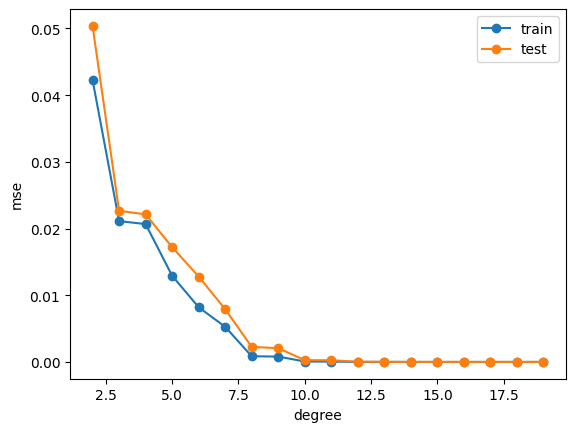

In [256]:
# e)

degrees = range(2, 20)
train_mse, test_mse = [], []

for p in degrees:
    X = polynomial_features(x, p)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1705)
    beta = OLS_parameters(X_train, y_train)
    yhat_tr = X_train @ beta
    yhat_te = X_test  @ beta
    train_mse.append(np.mean((y_train - yhat_tr)**2))
    test_mse.append(np.mean((y_test  - yhat_te)**2))

plt.plot(degrees, train_mse, marker='o', label='train')
plt.plot(degrees, test_mse, marker='o', label='test')
plt.xlabel('degree')
plt.ylabel('mse')
plt.legend()
plt.show()


$\textbf{f)}$

Well, it does'nt seem as though I was able to reproduce the test decreasing steadily before increasing for some time. 

Although in general that shape of train mse always decreasing and test mse at some point increasing again speaks to the fact that the model at some point starts capturing patterns in the noise that aren't really part of the true estimated value. 

## Exercise 5

In [257]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [258]:
# a)

p = 10

x1 = polynomial_features(x,p)
x2 = PolynomialFeatures(degree=p, include_bias=True).fit_transform(x.reshape(-1,1))

print(x1.shape, x2.shape)
print(np.allclose(x1, x2))
print(np.max(np.abs(x1-x2)))

(100, 11) (100, 11)
True
1.4551915228366852e-11


In [259]:
# b)

p = 15
X = polynomial_features(x, p)

b1 = OLS_parameters(X, y)
lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)

b2 = lr.coef_

print(b1.shape, b2.shape)
print(np.allclose(b1, b2))
print(np.max(np.abs(b1-b2)))

(16,) (16,)
True
3.1086244689504383e-15
